In [4]:
import pathlib

import polars as pl

In [2]:
raw_dirpath = pathlib.Path("../data/raw")

train = pl.read_csv(raw_dirpath / "train.csv")
test = pl.read_csv(raw_dirpath / "test.csv")
submission = pl.read_csv(raw_dirpath / "sample_submission.csv")
concepts = pl.read_csv(raw_dirpath / "concepts.csv")

<Axes: >

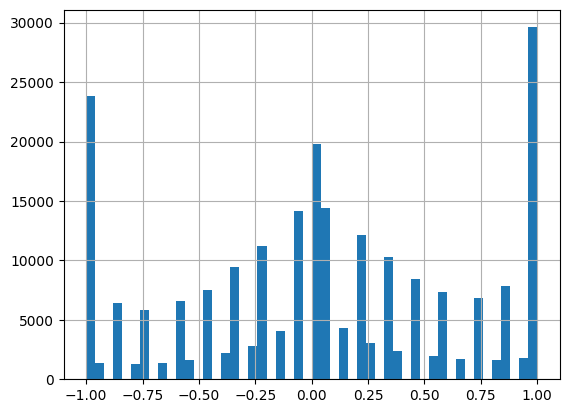

In [3]:
target = train.select(pl.col("utility_agent1")).to_pandas()

target["utility_agent1"].hist(bins=50)

In [40]:
d = {}
for row in (
    train["utility_agent1"]
    .round(1)
    .value_counts()
    .sort(by="utility_agent1")
    .iter_rows()
):
    d[row[0]] = row[1] / len(train) * 20

train.select(
    pl.col("utility_agent1")
    .round(1)
    .replace_strict(d)
    .alias("weight_inversed")
)

weight_inversed
f64
0.782133
1.047274
1.566667
1.047274
1.047274
…
0.617663
1.145373
0.731368
